# Simulation-- Genetic Drift

In this lecture we are going to do something a bit different: rather than focus on individual bits of code and learning about tools we will try to put our new found skills to a particular use. In this case we will be learning about one of the most important forces in evolution-- genetic drift. 

Genetic drift, by definition, is the stochastic (i.e. random) changes in the frequency of alleles in a population induced by the finite size of a population. However, the strength of drift depends on the size of the population, as a simple exercise in coin tossing will illustrate. In ten tosses you might easily get seven heads; in 1000 tosses, however, you would nearly never get 900 heads with a "fair" coin. 

The same sort of random fluctuation in allele frequencies can occur in small populations. A classic setup is the Urn Problem, in which we consider an urn full of red and black marbles each in equal frequency; we fill a new urn with marbles sampled from the first urn by choosing a marble at random, placing *a copy* into the new vessel, and replacing the original (what we call in the business *sampling with replacement*). A small sample of marbles will probably not equal the frequencies of red and black as in the original urn. This is akin to the random samples that determine the frequency of an allele in a new population. A second small sample will randomly shift the frequency to yet another frequency. If instead large samples of marbles are taken from the original urn (akin to large population size) then the frequency would be maintained more exactly in the next generation. This sampling process of marbles is roughly equivalent to the sampling process of alleles between generations, what we will call Genetic drift. 

**Exercise-** explain in a sentence why genetic drift is said to be a stronger force in small populations.


### An aside-- Bernoulli random number generator
A quick aside before we go any further. To initialize our population of $A_1$ and $A_2$ alleles we will want to use a Bernoulli random number generator. A Bernoulli random variable, call it $x$ is an r.v. which only takes the values $1$ or $0$ representing *sucess* and *failure* of an event to occur respectively, and call the probability of success, $p$. We say that $x \sim Ber(p)$ if $Prob(x = 1) = p$ and $Prob(x = 0) = 1-p$.

An illustrative way to write this probability is as 
$P(x) = p^x(1-p)^{1-x}$, where $x \in \{0,1\}$

What is the expected value of a Bernoulli random variable? Well lets use the definition of the expected value of a random variable and find out. 

$E(X) = \sum_iX_i \times Prob(X_i)$

so for our Bernoulli random variable $X$ with parameter $p$ this expectation would be

$E(X) = (1) \times p + (0) \times (1-p) = p $

Finally we are interested in the variance of our Bernoulli random variable. We will use the property of expectations to compute it

$Var(X) = E(X^2) - (E(X))^2$

so in the Bernoulli case

$E(X^2) = (1^2) \times p + (0^2) \times (1-p) = p $

$Var(X) = p - p^2 = p(1-p) $

**Exercise-** write a function that generates a Bernoulli random variable and confirm that it's expectation is $p$ by taking the average of many runs of your function. Also confirm that the variance above is correct.

In [116]:
def bernoulli_rv(p):
    if np.random.random() < p:
        return(1)
    else:
        return(0)
    
p = 0.5    
x = np.array([bernoulli_rv(p) for i in range(1000)])
print("Observed E(x) = ",x.mean()," Expected E(x) = ",p)
print("Observed Var(x) = ",x.var()," Expected Var(x) = ",p*(1-p))

Observed E(x) =  0.503  Expected E(x) =  0.5
Observed Var(x) =  0.24999099999999996  Expected Var(x) =  0.25


## Genetic drift the algorithm

Here's a very simple algorithm that describes all of the essentials of genetic drift. You will program this up in a minute but first let's consider the alogrithm in its totality. We will assume a population of $N$ diploid individuals and so has $2N$ total alleles. Among our $2N$ alleles there will be two kinds of alleles, call them $A_1$ and $A_2$. 

So here's the algorithm:
1. choose an allele at random from the $2N$ alleles in the parental generation
2. Make an exact copy of the allele
3. Place the copy of the allele in the next generation
4. Go back to 1 until the next generation has $2N$ alleles


We are going to start this process by writing a function that depends on your Bernoulli random number generator to initialize an array of zeros or ones, representing our two kinds of alleles. This will create a starting point for our simulation of drift. The function `initializePop()` takes two parameters `N` and `p`, representing the population size and the frequency of the $A_1$ allele.

In [44]:
import numpy as np
from matplotlib import pyplot as plt

def initializePop(N,p):
    pop = []
    for i in range(2*N):
        pop.append(bernoulli_rv(p)) #randomly set allele based on Ber(p)
    return(np.array(pop)) #cast as numpy array


npop = initializePop(10,0.3)
npop

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

Okay the population is initialized, now lets do genetic drift. To do it we will rely upon the numpy `random.choice()` function. We will loop over `gens` generations. Again our simple function `drift_gens` takes two parameters, `pop` and `gens` where `pop` is a numpy array initialized from the `initializePop()` function and `gens` is the number of generations we want to simulate drift for. 

The heavy lifting is being done by a numpy routine called `np.random.choice()` which samples an array with or without replacement for you. In the function below we also plot the results so that we can get a visualization of the process. 

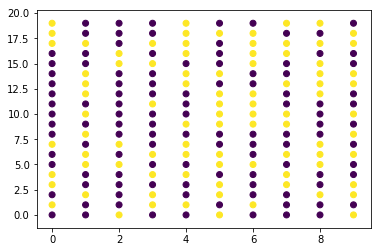

In [45]:
def drift_gens(pop,gens):
    for i in range(gens):
        pop = np.random.choice(pop,len(pop),replace=True) #let numpy take random sample for us
        plt.scatter(np.full(2*N,i),list(range(2*N)),c=pop) #plot it

drift_gens(npop,10)

## Genetic drift as a dispersive force
One of the main ways that genetic drift acts is as a dispersive force on allele frequencies
(i.e. it moves allele frequencies about randomly). A neat way to see this is to imagine
replicate populations (either experimental or natural). Consider a grid of small populations
 (e.g., ponds in Oregon), all with the same small population size and all starting at
 time t with $p = q= 0.5$. Through time each population will experience genetic drift due to
 random sampling and the frequencies in each population will *diverge*. The distribution
 of frequencies changes over time from a tight distribution (all 0.5), to a flat distribution
 (some populations at $p = 0.1$, some at $p=0.9$ and all frequencies in between), to fixation 
($p =1.0$) or loss ($p = 0.0$) of the alleles in all populations. Fixation is when all alleles in the population are $A_1$; this necessarily implies loss of the $A_2$ allele ("fixation" or "loss" should only be used with reference to a specific allele). If each population starts at $p = 0.5$, then at the end, when all populations have lost their variation, 50% of the populations will be fixed for the $A_1$ allele and 50% will be fixed for the $A_2$ allele (latter = "loss" for the $A_1$ allele, get it?). If the initial frequency was $p = 0.7$, then 70% of the populations would be fixed for the $A_1$ allele (assuming no selection, migration, mutation). 

## Binomial random variables and drift

Our process of sampling alleles from generation to generation is exactly like flipping a coin, or sampling marbles from an urn as pointed out above, thus the natural way to model it will be with a Binomial random variable. To explain what a binomical r.v. even is let's start with the canonical example of tossing a coin. Let the probability of flipping our coin and getting a heads be $P(head) = p$ and the probability of a tails be $P(tails) = 1 - p$. If we call $X$ the outcome of a single flip, then $X$ is a Bernoulli r.v. with probability $p$, or more succinctly $X \sim Ber(p)$ where $X = 1$ for a heads and $X = 0$ for a tails.

If we fip our coin $n$ times then our random variable $X$ can take the values $X \in \{1,2,...,n\}$ where the probability that $X=k$ is

$ P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$

The first part of this ("n choose k") represents the number of different ordering of 1s and 0s that are possible from a sample of size $n$ with $k$ successes. The second part represents the probability of getting exactly $k$ successes. We can write $X \sim Binom(n,p)$ to specify our probability distribution. For the case of genetic drift, $n$ is the population size and $p$ is the frequency of our allele of interest.

*Expected value:* The expected value of a binomial r.v. that is distributed as $X \sim Binom(n,p)$, $E(X) = np$. Why? Well the proof is easy. Note that each coin flip is itself a Bernoulli trial where $x_i \sim Ber(p)$. 

$E(X) = E(x_1 + x_2 + \ldots + x_n) = E(x_1) + E(x_2) + \ldots + E(x_n)$

$E(X) = np $

a similar property holds for the variance of a r.v. which is composed of the sum of independent r.v.'s such that

$Var(x_1 + x_2 + \ldots + x_n) = Var(x_1) + Var(x_2) + \ldots + Var(x_n) $

so the variance of our binomial r.v. $Var(X) = np(1-p)$

Why does this matter? Well let's consider genetic drift for a minute. Imagine we have a population of size $2N$ alleles and imagine that the frequency of the $A_1$ allele is currently $p$. What is the frequency of $A_1$ in the next generation (call it $p^\prime$)?

$p^\prime \sim Binom(2N,p) $

So the expected value of $p^\prime$, $E(p^\prime) = 2Np / N$.

In [ ]:
def drift2(N, p0, gens, reps):
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    for i in range(1,gens):
        p_N = np.array([np.random.binomial(N,x) for x in p[i-1,:]])
        p[i,:] = p_N/ N
    return(p)



Text(0.5, 0, 'generation')

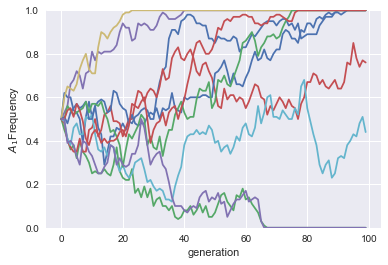

In [97]:
# now use drift(2) to plot 10 replicates
# of N=100, p0=0.5, for 100 generations
plt.plot(drift2(100,0.5,100,10))
plt.ylim(0,1)
plt.ylabel(r'$A_1$' "Frequency")
plt.xlabel("generation")

**Exercise:** use drift2() to plot drift in replicated populations for each of $N=100, N=1000, N=10000$. What is happening here?

**Exercise:** make a plot of the average allele frequency across replicate populations versus time. Does this make sense?

**Exercise:** write a function that will compute the probability of an allele going to frequency 1 in our drifting populations. *Hint:* just run drift2() for a while and count the number of 1s you observe. 

**Exercise:** use the function you wrote in the exercise above to compute 